In [1]:
import pandas as pd

In [5]:
data1 = ['a','b','c','d','e']
sr1 = pd.Series(data1)
print (sr1)

0    a
1    b
2    c
3    d
4    e
dtype: object


In [2]:

data2 = [1,2,3.14,100,-10]

sr2 = pd.Series(data2) 

In [4]:
print(sr2)

0      1.00
1      2.00
2      3.14
3    100.00
4    -10.00
dtype: float64


In [6]:
dict_data = {'c0': sr1, 'c1': sr2}

In [7]:
df1 = pd.DataFrame(dict_data)

In [8]:
print(df1)

  c0      c1
0  a    1.00
1  b    2.00
2  c    3.14
3  d  100.00
4  e  -10.00


In [9]:
df1.columns = ['string','number']

In [10]:
df1

,string,number
0,a,1.00
1,b,2.00
2,c,3.14
3,d,100.00
4,e,-10.00


In [11]:
df1.index

RangeIndex(start=0, stop=5, step=1)

In [12]:
df1.index = ['r0','r1','r2','r3','r4']

In [13]:
df1

,string,number
r0,a,1.00
r1,b,2.00
r2,c,3.14
r3,d,100.00
r4,e,-10.00


In [16]:
df1.loc['r2','number']

3.14

In [17]:
df1.loc['r2':'r3', 'string':'number']

,string,number
r2,c,3.14
r3,d,100.00


In [18]:
df1.loc['r2', 'string':'number']

string       c
number    3.14
Name: r2, dtype: object

In [19]:
type (df1.loc['r2', 'string':'number'])

pandas.core.series.Series

In [20]:
df1.loc[:,'string']

r0    a
r1    b
r2    c
r3    d
r4    e
Name: string, dtype: object

## 일차함수 관계식 찾기 

### 3-1 문제 파악 

In [34]:
x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

print(x,'\n', y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14] 
 [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


### 3-2 데이터 탐색 

x와 y변수 사이에 관계식을 그래프로 그려보는 것이 가장 빠르다. 
Matplotlib 


In [24]:
import matplotlib.pyplot as plt 

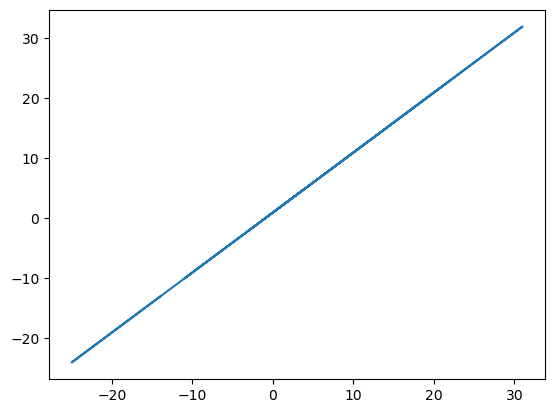

In [35]:
plt.plot(x,y)

In [26]:
plt.show()

### 3-3 데이터 전처리 
전처리를 위해 Pandas를 사용한다.


In [37]:
import pandas as pd

In [39]:
df = pd.DataFrame({'X':x,'y':y})

In [40]:
df.shape

(10, 2)

In [41]:
print(df)

    X   y
0  -3  -2
1  31  32
2 -11 -10
3   4   5
4   0   1
5  22  23
6  -2  -1
7  -5  -4
8 -25 -24
9 -14 -13


In [42]:
df.tail()

,X,y
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [43]:
train_features = ['X']
target_cols = ['y']

In [46]:
X_train = df.loc[:, train_features]
y_train = df.loc[:, target_cols]

In [48]:
print(X_train.shape, y_train.shape)

(10, 1) (10, 1)


### 3-4 모델 학습 

선형회귀 관계식 sklearn linear_model 에 LinearRegression 클레스를 사용한다.

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression() # 객체 생성 

In [52]:
lin_reg.fit(X_train,y_train) # 각 각 PD data frame 을 입력 받고 학습함

LinearRegression()

In [55]:
# coef_ : 회귀계수 기울기, intercept_ : 절편 상수항 

lin_reg.coef_ , lin_reg.intercept_

(array([[1.]]), array([1.]))

In [56]:
print('기울기 : ', lin_reg.coef_[0][0] )

기울기 :  0.9999999999999999


In [58]:
print('절편 :',lin_reg.intercept_[0])

절편 : 0.9999999999999999


### 3-5 예측하기 

학습을 마친후 predict 메소드를 이용해서 새로운 X값에 대한 Y 레이블을 예측할 수 있다. 
X 값으로 숫자 11 Y를 예측 해보자 

In [59]:
import numpy as np

In [87]:
x_new_value = np.array([11,12]).reshape(-1,1)

In [88]:
print(x_new_value)

[[11]
 [12]]


In [89]:
lin_reg.predict(x_new_value)

/Users/sl/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.],
       [13.]])

여러 Feature 를 대입해보도록 하자 
np.arange(11,16,1) 5개의 1차원 배열을 만든다 
reshape(-1,1) (-1 은 얼마나 많은 배열이 들어올지 모를때 사용하면 유용하다) 

In [83]:
X_test = np.arange(11,16,1).reshape(-1,1)

In [84]:
print(X_test)

[[11]
 [12]
 [13]
 [14]
 [15]]


In [85]:
y_predict = lin_reg.predict(X_test)

/Users/sl/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
print(y_predict)

[[12.]
 [13.]
 [14.]
 [15.]
 [16.]]
